In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_excel('/content/s&p 500.xlsx')

In [3]:
df.head()


,Date,Open,High,Low,Close,Volume
0,2020-01-27 16:00:00,3247.16,3258.85,3234.50,3243.63,0
1,2020-01-28 16:00:00,3255.35,3285.78,3253.22,3276.24,0
2,2020-01-29 16:00:00,3289.46,3293.47,3271.89,3273.40,0
3,2020-01-30 16:00:00,3256.45,3285.91,3242.80,3283.66,0
4,2020-01-31 16:00:00,3282.33,3282.33,3214.68,3225.52,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
725,2022-12-09 16:00:00,3954.17,3977.02,3933.04,3934.38,0
726,2022-12-12 16:00:00,3939.29,3990.71,3935.30,3990.56,0
727,2022-12-13 16:00:00,4069.38,4100.96,3993.03,4019.65,0
728,2022-12-14 16:00:00,4015.54,4053.76,3965.65,3995.32,0
729,2022-12-15 16:00:00,3958.37,3958.37,3879.45,3895.75,0


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,3875.017753,3901.967589,3845.669918,3875.157356,1.116034e+06
std,554.037233,551.458585,556.784866,554.163283,3.015358e+07
min,2290.710000,2300.730000,2191.860000,2237.400000,0.000000e+00
25%,3450.877500,3479.630000,3429.377500,3448.495000,0.000000e+00
50%,3936.025000,3961.970000,3910.800000,3935.935000,0.000000e+00
75%,4332.337500,4368.157500,4290.210000,4345.175000,0.000000e+00
max,4804.510000,4818.620000,4780.040000,4796.560000,8.147049e+08


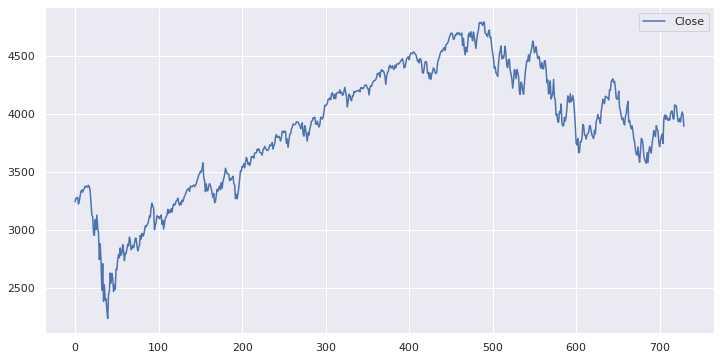

In [6]:
df[['Close']].plot(figsize=(12,6));


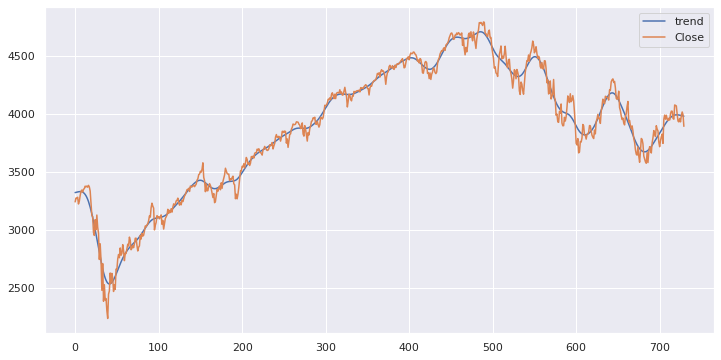

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.4813372710595674,
 0.5427224970484305,
 9,
 720,
 {'1%': -3.439464954327953,
  '5%': -2.8655625802683473,
  '10%': -2.5689120852623457},
 7657.0132053688685)

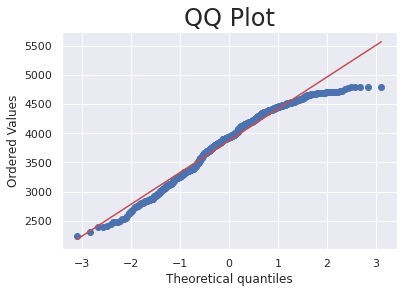

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


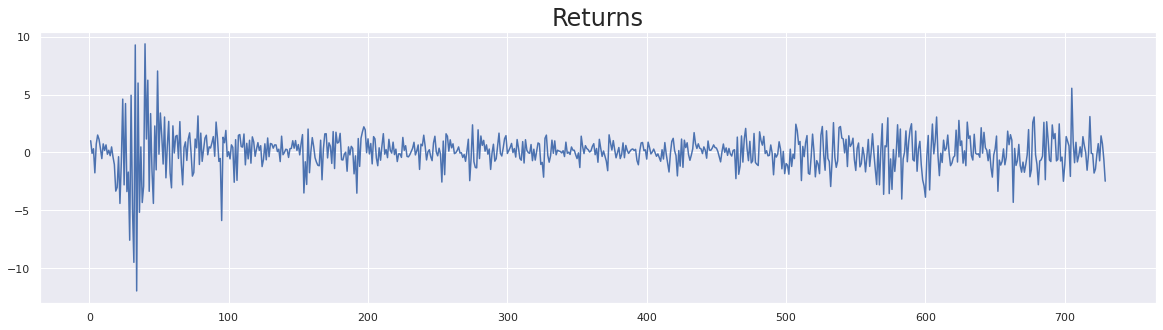

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


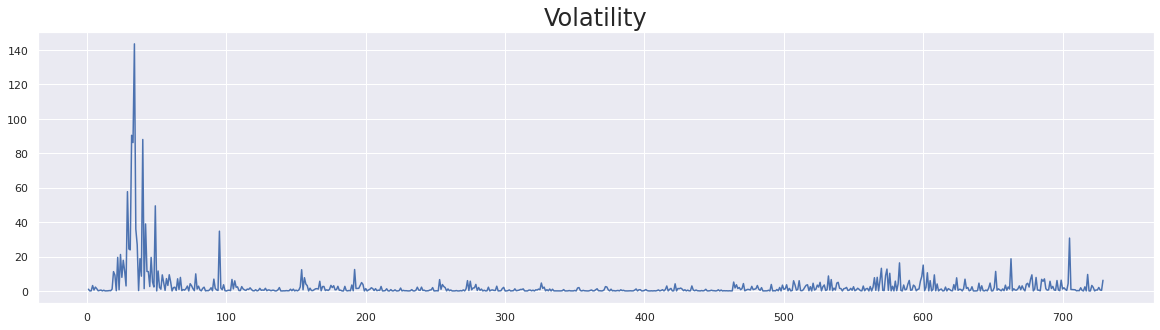

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

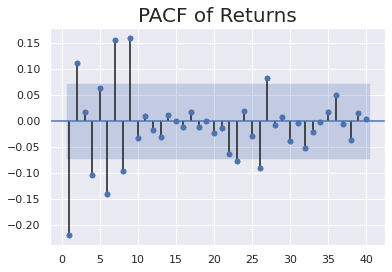

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

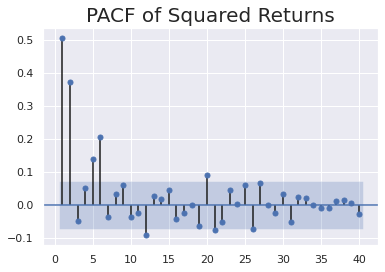

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 31.5 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4028.1091458339274
Iteration:      2,   Func. Count:     12,   Neg. LLF: 556296.4449388402
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1293.0446699144204
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1559.3420855549489
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1283.4413807679312
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1283.4395601210194
Iteration:      7,   Func. Count:     36,   Neg. LLF: 1283.4394666854175
Iteration:      8,   Func. Count:     39,   Neg. LLF: 1283.4394666853677
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1283.4394666854175
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1283.44
Distribution:                  Normal   AIC:                           2572.88
Method:            Maximum Likelihood   BIC:                           2586.65
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:55   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1454  5.199e-02      2.796  5.175e-03 [4.346e-02,  0.247]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.2649      0.160      7.928  2.230e-15 [  0.952,  1.578]
alpha[1]       0.5592      0.164      3.420  6.260e-04 [  0.239,  0.880]
========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1228.3610678272166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1228.3610586629125
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1228.36
Distribution:                  Normal   AIC:                           2464.72
Method:            Maximum Likelihood   BIC:                           2483.09
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:55   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1116  4.311e-02      2.588  9.652e-03 [2.708e-02,  0.196]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.7746      0.125      6.213  5.215e-10 [  0.530,  1.019]
alpha[1]       0.3297      0.114      2.904  3.684e-03 [  0.107,  0.552]
alpha[2]       0.3917  8.336e-02      4.699  2.620e-06 [  0.228,  0.555]
========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1210.8702507830535
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1208.9741700956438
            Iterations: 9
            Function evaluations: 67
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1208.97
Distribution:                  Normal   AIC:                           2427.95
Method:            Maximum Likelihood   BIC:                           2450.91
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:55   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0945  4.282e-02      2.207  2.728e-02 [1.060e-02,  0.178]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5413      0.119      4.565  5.007e-06   [  0.309,  0.774]
alpha[1]       0.2532      0.109      2.321  2.031e-02 [3.934e-02,  0.467]
alpha[2]       0.3202  6.803e-02      4.706  2.521e-06   [  0.187,  0.453]
alpha[3]       0.2742  8.054e-02      3.404  6.633e-04   [  0.116,  0.432]
==========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 1337.0713069439362
Iteration:     10,   Func. Count:    173,   Neg. LLF: 1678.4689150339366
Iteration:     15,   Func. Count:    259,   Neg. LLF: 1189.1788651612878
Iteration:     20,   Func. Count:    344,   Neg. LLF: 1188.3916746528205
Iteration:     25,   Func. Count:    425,   Neg. LLF: 1188.0199173443364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1188.0199173443364
            Iterations: 26
            Function evaluations: 440
            Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1188.02
Distribution:                  Normal   AIC:                           2406.04
Method:            Maximum Likelihood   BIC:                           2474.91
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:55   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0921  4.183e-02      2.202  2.768e-02 [1.012e-02,  0.174]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.3165      0.123      2.577  9.980e-03    [7.574e-02,  0.557]
alpha[1]       0.1931      0.109      1.770  7.676e-02   [-2.075e-02,  0.407]
alpha[2]       0.1941  6.019e-02      3.225  1.261e-03    [7.612e-02,  0.312]
alpha[3]       0.1120  5.971e-02      1.877  6.058e-02   [-4.979e-03,  0.229]
alpha[4]       0.1357  9.371e-02      1.448      0.147   [-4.793e-02,  0.319]
alpha[5]       0.0622  6.404e-02      0.971      0.331   [-6.332e-02,  0.188]
alpha[6]       0.0509  5.491e-02      0.926      0.354   [-5.677e-02,  0.158]
alpha[7]   5.6548e-13  8.551e-02  6.613e-12      1.000      [ -0.168,  0.168]
alpha[8]   8.6763e-03  3.324e-02      0.261      0.794 [-5.647e-02,7.383e-02]
alpha[9]       0.0193  2.609e-02      0.738      0.461 [-3.189e-02,7.039e-02]
alpha[10]  5.5866e-13  9.330e-02  5.988e-12      1.000      [ -0.183,  0.183]
alpha[11]      0.0500  3.954e-02      1.264      0.206   [-2.751e-02,  0.127]
alpha[12]  1.5023e-12  7.536e-02  1.993e-11      1.000      [ -0.148,  0.148]
alpha[13]      0.0682  4.509e-02      1.512      0.131   [-2.020e-02,  0.157]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1193.8751927538501
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1193.859090476071
            Iterations: 9
            Function evaluations: 59
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1193.86
Distribution:                  Normal   AIC:                           2395.72
Method:            Maximum Likelihood   BIC:                           2414.08
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0823  3.946e-02      2.085  3.703e-02 [4.954e-03,  0.160]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0739  3.752e-02      1.969  4.901e-02 [3.205e-04,  0.147]
alpha[1]       0.2115  7.071e-02      2.992  2.774e-03 [7.296e-02,  0.350]
beta[1]        0.7663  6.888e-02     11.124  9.604e-29   [  0.631,  0.901]
==========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1856.389427692157
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1193.859090492644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1193.859090456412
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1193.86
Distribution:                  Normal   AIC:                           2397.72
Method:            Maximum Likelihood   BIC:                           2420.68
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0823  3.948e-02      2.084  3.712e-02 [4.915e-03,  0.160]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0739  3.680e-02      2.008  4.468e-02 [1.755e-03,  0.146]
alpha[1]       0.2115  7.160e-02      2.954  3.134e-03 [7.120e-02,  0.352]
beta[1]        0.7662      0.307      2.499  1.244e-02   [  0.165,  1.367]
beta[2]        0.0000      0.284      0.000      1.000   [ -0.556,  0.556]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1197.9585815205992
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1193.8601191383425
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1193.8590333077461
            Iterations: 13
            Function evaluations: 102
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1193.86
Distribution:                  Normal   AIC:                           2399.72
Method:            Maximum Likelihood   BIC:                           2427.27
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0823  3.928e-02      2.095  3.615e-02 [5.314e-03,  0.159]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0739  3.798e-02      1.945  5.181e-02 [-5.794e-04,  0.148]
alpha[1]       0.2118  7.188e-02      2.946  3.216e-03  [7.089e-02,  0.353]
beta[1]        0.7647      0.277      2.757  5.828e-03    [  0.221,  1.308]
beta[2]    2.7978e-15      0.270  1.037e-14      1.000    [ -0.529,  0.529]
beta[3]    1.2941e-03      0.210  6.170e-03      0.995    [ -0.410,  0.412]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1193.8874551453098
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1193.5693158550407
            Iterations: 9
            Function evaluations: 67
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1193.57
Distribution:                  Normal   AIC:                           2397.14
Method:            Maximum Likelihood   BIC:                           2420.10
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0810  4.000e-02      2.025  4.288e-02 [2.598e-03,  0.159]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0926  6.100e-02      1.519      0.129 [-2.691e-02,  0.212]
alpha[1]       0.1777      0.101      1.761  7.825e-02 [-2.008e-02,  0.375]
alpha[2]       0.0641      0.138      0.463      0.643    [ -0.207,  0.335]
beta[1]        0.7281      0.108      6.756  1.422e-11    [  0.517,  0.939]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     48,   Neg. LLF: 1255.1534822867102
Iteration:     10,   Func. Count:     87,   Neg. LLF: 1193.5693222479154
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1193.5693154375308
            Iterations: 12
            Function evaluations: 101
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1193.57
Distribution:                  Normal   AIC:                           2399.14
Method:            Maximum Likelihood   BIC:                           2426.69
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0810  3.929e-02      2.062  3.921e-02 [4.008e-03,  0.158]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0926      0.164      0.565      0.572    [ -0.229,  0.414]
alpha[1]       0.1777      0.111      1.608      0.108 [-3.892e-02,  0.394]
alpha[2]       0.0641      0.171      0.376      0.707    [ -0.270,  0.398]
alpha[3]       0.0000      0.221      0.000      1.000    [ -0.433,  0.433]
beta[1]        0.7281      0.355      2.049  4.047e-02  [3.160e-02,  1.425]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 44965746.22812722
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1188.0082896567105
Iteration:     15,   Func. Count:    106,   Neg. LLF: 1188.00774072885
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1188.0077407285435
            Iterations: 15
            Function evaluations: 106
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1188.01
Distribution:                  Normal   AIC:                           2386.02
Method:            Maximum Likelihood   BIC:                           2408.97
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:56   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0370  3.842e-02      0.962      0.336 [-3.834e-02,  0.112]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0351  2.257e-02      1.554      0.120 [-9.159e-03,7.933e-02]
alpha[1]       0.3174      0.113      2.808  4.987e-03    [9.586e-02,  0.539]
gamma[1]      -0.1227  4.172e-02     -2.942  3.261e-03   [ -0.205,-4.097e-02]
beta[1]        0.9397  2.434e-02     38.601      0.000      [  0.892,  0.987]
=============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1190.04
Distribution:                  Normal   AIC:                           2390.08
Method:            Maximum Likelihood   BIC:                           2413.04
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:56   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0521  3.804e-02      1.369      0.171 [-2.250e-02,  0.127]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0781  3.794e-02      2.060  3.944e-02  [3.778e-03,  0.152]
alpha[1]       0.1192  8.100e-02      1.472      0.141 [-3.953e-02,  0.278]
gamma[1]       0.1709      0.104      1.648  9.938e-02 [-3.236e-02,  0.374]
beta[1]        0.7688  7.246e-02     10.610  2.681e-26    [  0.627,  0.911]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1186.097055005318
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1181.7899744421643
Iteration:     15,   Func. Count:    104,   Neg. LLF: 1181.7789323702357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1181.7789323708862
            Iterations: 15
            Function evaluations: 104
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1181.78
Distribution:                  Normal   AIC:                           2373.56
Method:            Maximum Likelihood   BIC:                           2396.52
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:57   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0353  3.760e-02      0.939      0.348 [-3.837e-02,  0.109]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0858  2.997e-02      2.864  4.186e-03  [2.709e-02,  0.145]
alpha[1]       0.0886  6.617e-02      1.339      0.180 [-4.107e-02,  0.218]
gamma[1]       0.1940  5.622e-02      3.450  5.599e-04  [8.380e-02,  0.304]
beta[1]        0.7926  5.771e-02     13.736  6.202e-43    [  0.680,  0.906]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 10371304.266242452
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1190.9723882747974
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1190.9723871709202
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1190.97
Distribution:                  Normal   AIC:                           2391.94
Method:            Maximum Likelihood   BIC:                           2414.90
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:57   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0802  3.868e-02      2.073  3.815e-02 [4.382e-03,  0.156]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0751  4.926e-02      1.525      0.127 [-2.143e-02,  0.172]
phi        1.2343e-14      0.143  8.641e-14      1.000    [ -0.280,  0.280]
d              0.7227      0.121      5.996  2.020e-09    [  0.486,  0.959]
beta           0.5248      0.135      3.899  9.643e-05    [  0.261,  0.789]
===========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1304.7240987346934
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1283.44230834781
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1283.4394666401377
            Iterations: 14
            Function evaluations: 72
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1283.44
Distribution:                  Normal   AIC:                           2572.88
Method:            Maximum Likelihood   BIC:                           2586.65
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:57   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1454  5.199e-02      2.796  5.175e-03 [4.346e-02,  0.247]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.2649      0.160      7.928  2.233e-15 [  0.952,  1.578]
alpha[1]       0.5593      0.164      3.420  6.262e-04 [  0.239,  0.880]
========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 5518.19506451959
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2633.164743767596
Iteration:     15,   Func. Count:    124,   Neg. LLF: 1180.7347626116807
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1180.7241346400035
            Iterations: 19
            Function evaluations: 153
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1180.72
Distribution:                  Normal   AIC:                           2373.45
Method:            Maximum Likelihood   BIC:                           2401.00
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:46:57   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0226  2.573e-02      0.876      0.381 [-2.789e-02,7.299e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0905  2.527e-02      3.581  3.419e-04 [4.097e-02,  0.140]
alpha[1]       0.1733  3.627e-02      4.778  1.773e-06   [  0.102,  0.244]
gamma[1]       0.6698      0.186      3.602  3.153e-04   [  0.305,  1.034]
beta[1]        0.7899  5.154e-02     15.325  5.196e-53   [  0.689,  0.891]
delta          0.4757      0.231      2.060  3.937e-02 [2.317e-02,  0.928]
==========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=40.340298014692316, pvalue=1.7386636574912018e-09)

In [46]:
jarque_bera_test.statistic

40.340298014692316

In [47]:
jarque_bera_test.pvalue

1.7386636574912018e-09

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      1.005355
2     -0.086685
3      0.313436
4     -1.770585
5      0.725464
         ...   
725   -0.734955
726    1.427925
727    0.728970
728   -0.605277
729   -2.492166
Name: returns, Length: 729, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=2949.2304687404066, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

2949.2304687404066

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

9.88723483442298

coef. asimetria

In [53]:
returns.skew()

-0.45694789703075583

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.161
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -3.527
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.989
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.150
P-value                         0.390
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        730 non-null    datetime64[ns]
 1   Open        730 non-null    float64       
 2   High        730 non-null    float64       
 3   Low         730 non-null    float64       
 4   Close       730 non-null    float64       
 5   Volume      730 non-null    int64         
 6   trend       730 non-null    float64       
 7   returns     729 non-null    float64       
 8   sq_returns  729 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 51.5 KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_excel("/content/s&p 500.xlsx")

In [66]:
data

,Date,Open,High,Low,Close,Volume
0,2020-01-27 16:00:00,3247.16,3258.85,3234.50,3243.63,0
1,2020-01-28 16:00:00,3255.35,3285.78,3253.22,3276.24,0
2,2020-01-29 16:00:00,3289.46,3293.47,3271.89,3273.40,0
3,2020-01-30 16:00:00,3256.45,3285.91,3242.80,3283.66,0
4,2020-01-31 16:00:00,3282.33,3282.33,3214.68,3225.52,0
...,...,...,...,...,...,...
725,2022-12-09 16:00:00,3954.17,3977.02,3933.04,3934.38,0
726,2022-12-12 16:00:00,3939.29,3990.71,3935.30,3990.56,0
727,2022-12-13 16:00:00,4069.38,4100.96,3993.03,4019.65,0
728,2022-12-14 16:00:00,4015.54,4053.76,3965.65,3995.32,0


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27 16:00:00,3243.63,0
1,2020-01-28 16:00:00,3276.24,0
2,2020-01-29 16:00:00,3273.40,0
3,2020-01-30 16:00:00,3283.66,0
4,2020-01-31 16:00:00,3225.52,0
...,...,...,...
725,2022-12-09 16:00:00,3934.38,0
726,2022-12-12 16:00:00,3990.56,0
727,2022-12-13 16:00:00,4019.65,0
728,2022-12-14 16:00:00,3995.32,0


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,3243.63,0,3276.24
1,2020-01-28 16:00:00,3276.24,0,3273.40
2,2020-01-29 16:00:00,3273.40,0,3283.66
3,2020-01-30 16:00:00,3283.66,0,3225.52
4,2020-01-31 16:00:00,3225.52,0,3248.92
...,...,...,...,...
725,2022-12-09 16:00:00,3934.38,0,3990.56
726,2022-12-12 16:00:00,3990.56,0,4019.65
727,2022-12-13 16:00:00,4019.65,0,3995.32
728,2022-12-14 16:00:00,3995.32,0,3895.75


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,3243.63,0,3276.24
1,2020-01-28 16:00:00,3276.24,0,3273.40
2,2020-01-29 16:00:00,3273.40,0,3283.66
3,2020-01-30 16:00:00,3283.66,0,3225.52
4,2020-01-31 16:00:00,3225.52,0,3248.92
...,...,...,...,...
724,2022-12-08 16:00:00,3963.51,0,3934.38
725,2022-12-09 16:00:00,3934.38,0,3990.56
726,2022-12-12 16:00:00,3990.56,0,4019.65
727,2022-12-13 16:00:00,4019.65,0,3995.32


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.39318761, 0.        , 0.40593007],
       [0.40593007, 0.        , 0.40482033],
       [0.40482033, 0.        , 0.40882946],
       ...,
       [0.68505291, 0.        , 0.69641992],
       [0.69641992, 0.        , 0.68691289],
       [0.68691289, 0.        , 0.6480056 ]])

In [73]:
price_volume_target_scaled_df.shape

(729, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [78]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

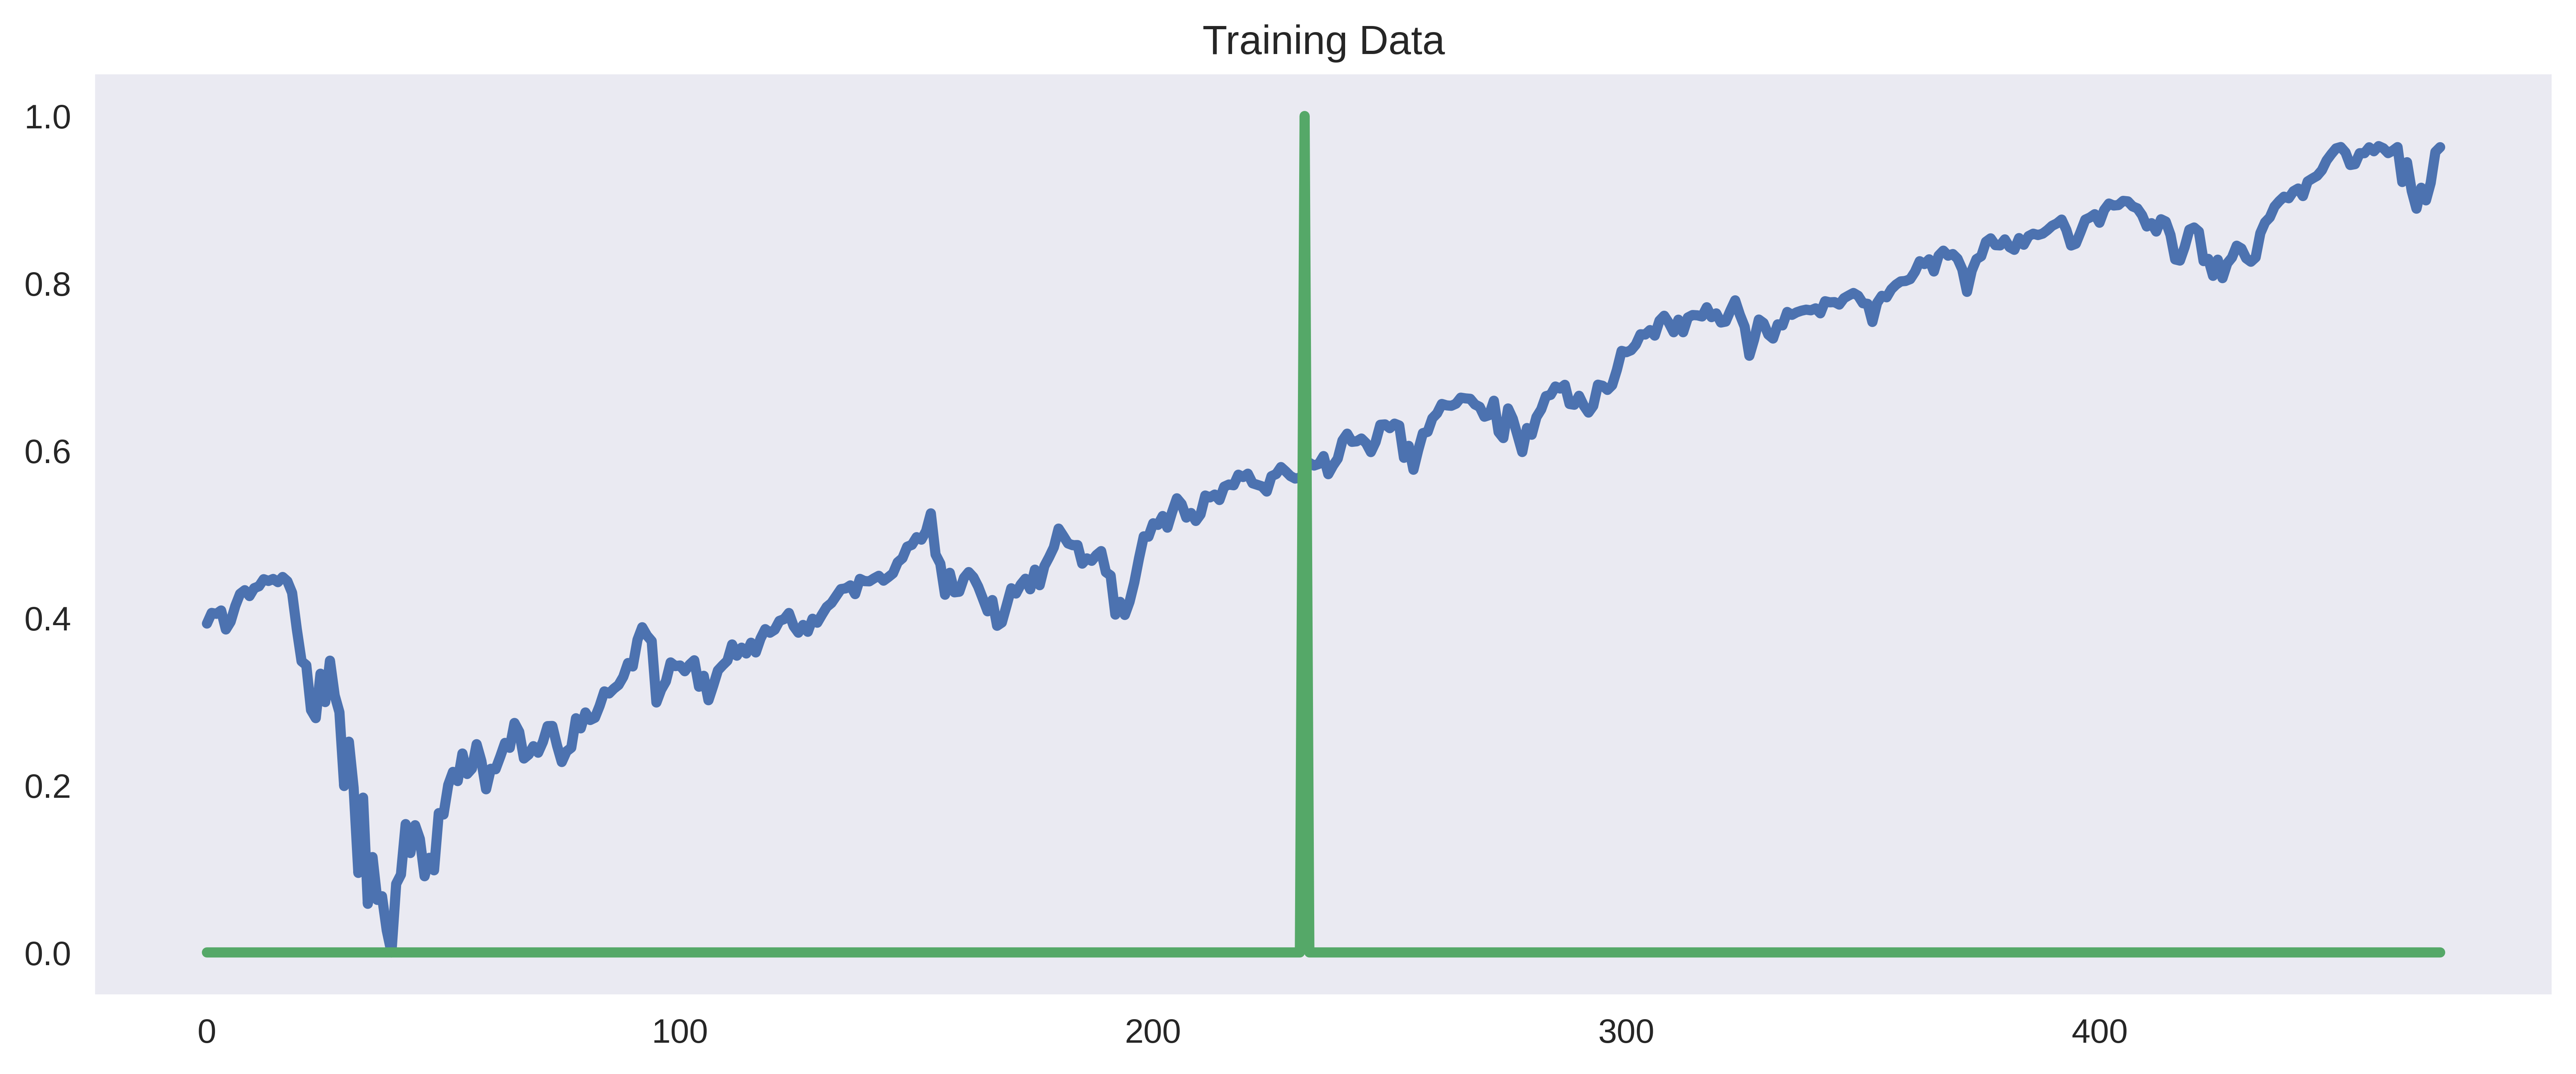

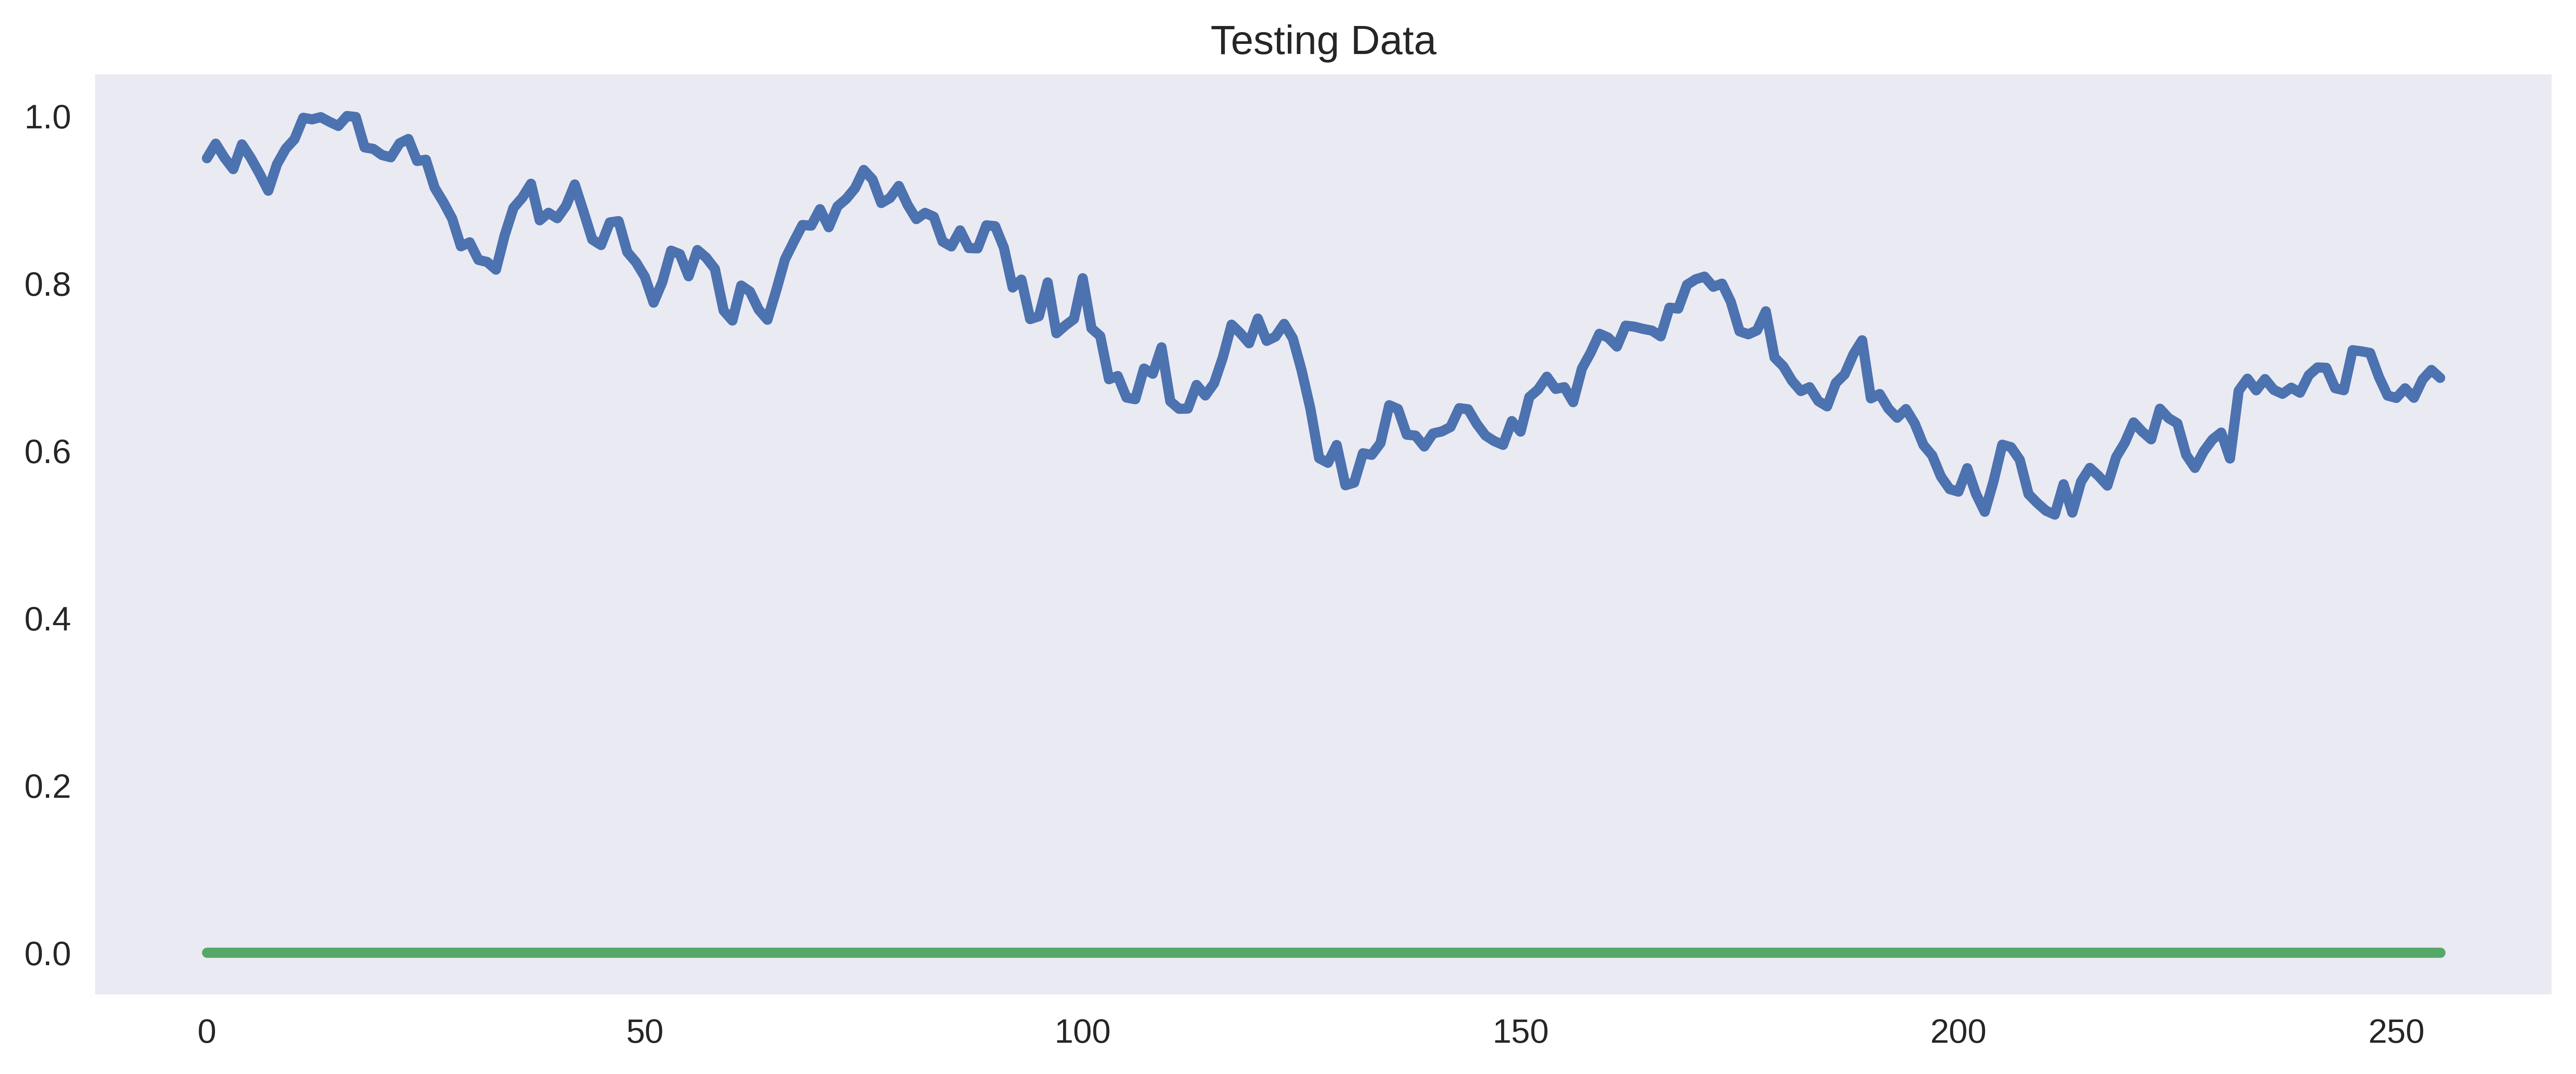

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9613097635722304


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.40172087],
       [0.41396701],
       [0.41290049],
       [0.41675346],
       [0.39491996],
       [0.40370744],
       [0.42198464],
       [0.43591693],
       [0.44008159],
       [0.4332957 ],
       [0.4424512 ],
       [0.44457672],
       [0.45272579],
       [0.45065661],
       [0.45299242],
       [0.44928591],
       [0.45524187],
       [0.45038998],
       [0.43706606],
       [0.39505891],
       [0.35837682],
       [0.35393802],
       [0.30225338],
       [0.29303779],
       [0.34411407],
       [0.31149525],
       [0.35909409],
       [0.31921997],
       [0.29985372],
       [0.21505456],
       [0.26600315],
       [0.2131093 ],
       [0.11519276],
       [0.20170811],
       [0.07970111],
       [0.1334249 ],
       [0.08419624],
       [0.08843601],
       [0.04920406],
       [0.02384805],
       [0.10268375],
       [0.11328505],
       [0.17130869],
       [0.13803645],
       [0.17002437],
       [0.15422944],
       [0.11138485],
       [0.132

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

729

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27 16:00:00
1,2020-01-28 16:00:00
2,2020-01-29 16:00:00
3,2020-01-30 16:00:00
4,2020-01-31 16:00:00
...,...
724,2022-12-08 16:00:00
725,2022-12-09 16:00:00
726,2022-12-12 16:00:00
727,2022-12-13 16:00:00


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27 16:00:00,0.393188
1,2020-01-28 16:00:00,0.405930
2,2020-01-29 16:00:00,0.404820
3,2020-01-30 16:00:00,0.408829
4,2020-01-31 16:00:00,0.386111
...,...,...
724,2022-12-08 16:00:00,0.674483
725,2022-12-09 16:00:00,0.663100
726,2022-12-12 16:00:00,0.685053
727,2022-12-13 16:00:00,0.696420


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27 16:00:00,0.393188,0.401721
1,2020-01-28 16:00:00,0.405930,0.413967
2,2020-01-29 16:00:00,0.404820,0.412900
3,2020-01-30 16:00:00,0.408829,0.416753
4,2020-01-31 16:00:00,0.386111,0.394920
...,...,...,...
724,2022-12-08 16:00:00,0.674483,0.672060
725,2022-12-09 16:00:00,0.663100,0.661120
726,2022-12-12 16:00:00,0.685053,0.682218
727,2022-12-13 16:00:00,0.696420,0.693142


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,3243.63,0,3276.24
1,2020-01-28 16:00:00,3276.24,0,3273.40
2,2020-01-29 16:00:00,3273.40,0,3283.66
3,2020-01-30 16:00:00,3283.66,0,3225.52
4,2020-01-31 16:00:00,3225.52,0,3248.92
...,...,...,...,...
725,2022-12-09 16:00:00,3934.38,0,3990.56
726,2022-12-12 16:00:00,3990.56,0,4019.65
727,2022-12-13 16:00:00,4019.65,0,3995.32
728,2022-12-14 16:00:00,3995.32,0,3895.75


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,3243.63,0,3276.24
1,2020-01-28 16:00:00,3276.24,0,3273.40
2,2020-01-29 16:00:00,3273.40,0,3283.66
3,2020-01-30 16:00:00,3283.66,0,3225.52
4,2020-01-31 16:00:00,3225.52,0,3248.92
...,...,...,...,...
725,2022-12-09 16:00:00,3934.38,0,3990.56
726,2022-12-12 16:00:00,3990.56,0,4019.65
727,2022-12-13 16:00:00,4019.65,0,3995.32
728,2022-12-14 16:00:00,3995.32,0,3895.75


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[3243.63,    0.  ],
       [3276.24,    0.  ],
       [3273.4 ,    0.  ],
       ...,
       [4019.65,    0.  ],
       [3995.32,    0.  ],
       [3895.75,    0.  ]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.39318761]),
 array([0.40593007]),
 array([0.40482033]),
 array([0.40882946]),
 array([0.38611107]),
 array([0.39525469]),
 array([0.41427265]),
 array([0.4287696]),
 array([0.43310305]),
 array([0.42604214]),
 array([0.4355687]),
 array([0.43778037]),
 array([0.44625971]),
 array([0.44410666]),
 array([0.44653715]),
 array([0.44268041]),
 array([0.44887776]),
 array([0.44382923]),
 array([0.4299653]),
 array([0.38625565]),
 array([0.34808687]),
 array([0.34346817]),
 array([0.2896888]),
 array([0.28009972]),
 array([0.33324607]),
 array([0.29930524]),
 array([0.34883321]),
 array([0.30734303]),
 array([0.28719189]),
 array([0.19895591]),
 array([0.2519694]),
 array([0.19693181]),
 array([0.09504681]),
 array([0.18506854]),
 array([0.05811673]),
 array([0.11401788]),
 array([0.06279404]),
 array([0.06720565]),
 array([0.02638366]),
 array([0.]),
 array([0.08203082]),
 array([0.09306179]),
 array([0.15343707]),
 array([0.11881633]),
 array([0.15210069]),
 array([0.13566561]),
 

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 11s 146ms/step - loss: 0.2804 - val_loss: 0.5636
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0990 - val_loss: 0.0234
Epoch 3/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0312 - val_loss: 0.0595
Epoch 4/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0205 - val_loss: 0.0462
Epoch 5/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0147 - val_loss: 0.0259
Epoch 6/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0121 - val_loss: 0.0224
Epoch 7/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0093 - val_loss: 0.0118
Epoch 8/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 9/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 10/20
13/13 [==============================] - 0s 17ms/step - loss: 0.0029 - val_loss: 3.5135e-04
Epo

In [102]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 4ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.39352834,
 0.4054755,
 0.40443254,
 0.40820262,
 0.38692045,
 0.39546227,
 0.4133311,
 0.42704546,
 0.4311607,
 0.4244591,
 0.43350536,
 0.4356105,
 0.443699,
 0.44164258,
 0.44396403,
 0.44028127,
 0.44620186,
 0.4413777,
 0.42818028,
 0.38705528,
 0.35174316,
 0.34750795,
 0.2987947,
 0.2902248,
 0.33816367,
 0.30742416,
 0.35242823,
 0.31466404,
 0.29655978,
 0.21910392,
 0.2652864,
 0.2173617,
 0.13165137,
 0.20718148,
 0.1015389,
 0.14731681,
 0.10532486,
 0.10890313,
 0.07606579,
 0.055167828,
 0.12098064,
 0.13001993,
 0.18029642,
 0.15130039,
 0.17916887,
 0.1653563,
 0.12839642,
 0.14657491,
 0.13422671,
 0.19141336,
 0.1899974,
 0.22025505,
 0.23371427,
 0.22418132,
 0.25286996,
 0.23152564,
 0.2370153,
 0.26264706,
 0.24504799,
 0.21574192,
 0.23693383,
 0.2364212,
 0.24968284,
 0.26399556,
 0.25880957,
 0.28510457,
 0.27571148,
 0.24762352,
 0.25173408,
 0.26054358,
 0.2536778,
 0.26492828,
 0.2817316,
 0.28191212,
 0.2611208,
 0.24397102,
 0.25507516,
 0.25891596,
 0.29

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28 16:00:00
2,2020-01-29 16:00:00
3,2020-01-30 16:00:00
4,2020-01-31 16:00:00
5,2020-02-03 16:00:00
...,...
725,2022-12-09 16:00:00
726,2022-12-12 16:00:00
727,2022-12-13 16:00:00
728,2022-12-14 16:00:00


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28 16:00:00,0.393528
2,2020-01-29 16:00:00,0.405475
3,2020-01-30 16:00:00,0.404433
4,2020-01-31 16:00:00,0.408203
5,2020-02-03 16:00:00,0.386920
...,...,...
725,2022-12-09 16:00:00,0.671775
726,2022-12-12 16:00:00,0.659928
727,2022-12-13 16:00:00,0.682821
728,2022-12-14 16:00:00,0.694748


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28 16:00:00,0.393528,0.405930
2,2020-01-29 16:00:00,0.405475,0.404820
3,2020-01-30 16:00:00,0.404433,0.408829
4,2020-01-31 16:00:00,0.408203,0.386111
5,2020-02-03 16:00:00,0.386920,0.395255
...,...,...,...
725,2022-12-09 16:00:00,0.671775,0.663100
726,2022-12-12 16:00:00,0.659928,0.685053
727,2022-12-13 16:00:00,0.682821,0.696420
728,2022-12-14 16:00:00,0.694748,0.686913


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")